In [1]:
from ipstartup import *
croot = "c:" if os.name=="nt" else "/mnt/c"
droot = "d:" if os.name=="nt" else "/mnt/d"
os.chdir(f"{droot}/data1")
sys.path.append(f"{croot}/Users/simon/OneDrive/Documents/py/live/slab/slab")
############################################################################
from transformers import pipeline
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
model = "nbroad/ESG-BERT"
feature_extraction = pipeline('feature-extraction', model=model)

[defaultlog:22:INFO]:logging started from /mnt/c/users/simon/onedrive/documents/py/live/pyutils/defaultlog.py (time=Jul-07 13:30 MainProcess)


Some weights of the model checkpoint at nbroad/ESG-BERT were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [2]:
sents = pd.read_csv("Clean_sentences.csv")
sents = sents.Sentences.tolist()
kpis = pd.read_excel("SustainLab_Generic_Granular_KPI list.xlsx", sheet_name="Granular KPI list").KPI.tolist()

[cellevents:43:INFO]:starting (time=Jul-07 13:30 MainProcess)


time: 590 ms


In [3]:
import re

def get_ngrams(s, maxn=999):
    s = s.lower()
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    tokens = [token for token in s.split(" ") if token != ""]
    ngrams = []
    for start in range(len(tokens)):
        for end in range(start, len(tokens)):
            if end+1-start > maxn:
                break
            ngram = " ".join(tokens[start:end+1])
            ngrams.append(ngram)
    return list(set(ngrams))

def get_feat(sents):
    """ return list of sent*features"""
    word_features = feature_extraction(sents)
    sent_features = [np.array(x).mean(axis=1) for x in word_features]
    features = [x[0] for x in sent_features]
    return features

[cellevents:43:INFO]:starting (time=Jul-07 13:30 MainProcess)


time: 5.06 ms


In [4]:
kpi_feat = get_feat(kpis)

[cellevents:43:INFO]:starting (time=Jul-07 13:30 MainProcess)


time: 13.2 s


# sentence embedding (mean)

In [6]:
best = []
for i, sent in enumerate(tqdm(sents)):
    sent_feat = get_feat([sent])
    res = cosine_similarity(sent_feat, kpi_feat)
    ix = np.unravel_index(res.argmax(), res.shape)
    best.append([kpis[ix[1]], res.max()])
sentdf = pd.DataFrame(best, index=sents, columns=["kpi", "score"])
sentdf.to_pickle("sentdf_gran")

[cellevents:43:INFO]:starting (time=Jul-06 17:36 MainProcess)


  0%|          | 0/126 [00:00<?, ?it/s]

time: 20.6 s


# ngram embedding

In [7]:
best = []
for i, sent in enumerate(tqdm(sents)):
    ngrams = get_ngrams(sent, 5)
    ngram_feat = get_feat(ngrams)
    res = cosine_similarity(ngram_feat, kpi_feat)
    ix = np.unravel_index(res.argmax(), res.shape)
    best.append([ngrams[ix[0]], kpis[ix[1]], res.max()])
ngramdf = pd.DataFrame(best, index=sents, columns=["ngram", "kpi", "score"])
ngramdf.to_pickle("ngramdf_gran")

[cellevents:43:INFO]:starting (time=Jul-06 17:36 MainProcess)


  0%|          | 0/126 [00:00<?, ?it/s]

time: 26min 16s


[cellevents:43:INFO]:starting (time=Jul-06 18:34 MainProcess)


<AxesSubplot:>

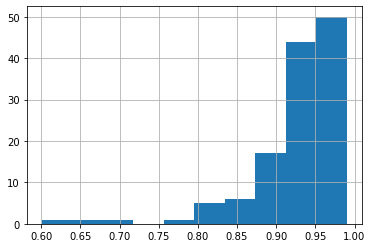

time: 1.59 s


In [8]:
ngramdf.score.hist()

In [9]:
ngramdf.sort_values("score")[:25]

[cellevents:43:INFO]:starting (time=Jul-06 18:34 MainProcess)


,ngram,kpi,score
"to reduce our environmental footprint, we utilise 7d virtual design construction (vdc), system formwork and industrialised building system (ibs), all of which help to reduce construction waste**.",help to reduce construction waste,particulate matter,0.601175
"instead of disposing of the oil after first use, we filter the used oil and use it for topping up, a:: transforming our portfolios to low-carbon sustainable cities which reduces the amount of new oil required.",and use it for topping,percentage of products purchased locally,0.645366
"taken together, these measures help us reduce the carbon_footprint of our glazed balconies by 30 percent -from 5,000 kg co, to 3,500 kg co,e-while also reducing the repayment period on the climate debt.",repayment period on the,net revenues (for public sector),0.705366
"for the 2020-2024 period, the company has set itself the new challenge of increasing its installed capacity by nearly 50%, adding 5,000 renewable mw to its current figures.",000 renewable mw,ratio of energy intensity of the organization,0.789870
"our strategic partnership with goodfuels/wartsila led to our boskalis on bio program, which delivered a world first for us when our willem van oranje became the first dredging vessel in the world to operate on 100% bio-fuel oil, allowing a 90% carbon reduction.",fuel oil allowing a 90,total fuel consumption from renewable sources,0.797047
"taking the tolerance values of the measuring system as a reference, it is estimated that they have managed to reduce the emission between 50% and 60%, which would be equivalent to more than 4,000 tonnes of co2.",emission,hazardous air pollutants,0.809274
"the initiative also demands footprint and yn sd th decentralises farming by ensuring every urban farm is within 5 km of the local_communities, reducing the food miles higher yield distance from farm to plate and eventually lowering consumers carbon_footprint.",the local communities,percentage of senior management from local com...,0.813576
"saved 380k of fuel, which can be used by 8,640 dump trucks effectiveness reduced coz emission by 980t transporting earth dug out from the site and other materials resulted in significant decrease along with greater effective- ness in safety due to the decline in the number of rounds made by vehicles.",saved 380k of fuel,amount of energy consumption reduced,0.824406
tree planting can help cool down cities by as much as 15c depending on the latitude-a small tree of not more than four meters tall is able to provide about 6 kw of cooling.,about 6 kw of cooling,total cooling energy sold,0.827585
"a forest plantation managed by new forests in australia our company-owned forests, mitsuis forests, absorb and fixate 160,000 tons of carbon dioxide annually it is estimated that the carbon dioxide absorbed and fixated by mitsuis forests amounts to approximately 160,000 tons per year, and co2 accumulation has reached approximately 10 million tons*'.",managed by new forests in,size of habitat areas protected,0.844047


time: 140 ms


In [10]:
out = ngramdf.join(sentdf, rsuffix="_sent")[["ngram", "kpi", "kpi_sent", "score", "score_sent"]]
out.to_excel("sent_ngram_gran.xlsx")
out

[cellevents:43:INFO]:starting (time=Jul-06 18:35 MainProcess)


,ngram,kpi,kpi_sent,score,score_sent
62.2% use of electricity from renewable_sources achieved and total energy consumption from fossil fuel sources reduced by 86% compared to 2017.,total energy consumption from,amount of energy consumption reduced,total fuel consumption from renewable sources,0.978319,0.939723
"at present, the energy expenditure has been reduced by 15%.",at present the energy expenditure,ratio of energy intensity of the organization,ratio of energy intensity of the organization,0.911764,0.873416
170 business leaders call on eu decision-makers to support a greenhouse gas (ghg) emissions reduction target of at least 55% by 2030.,ghg emissions reduction,co2 equivalent of GHG emissions reduced,Scope 2 GHG emissions of CO2 equivalent,0.975801,0.932535
"taking the tolerance values of the measuring system as a reference, it is estimated that they have managed to reduce the emission between 50% and 60%, which would be equivalent to more than 4,000 tonnes of co2.",emission,hazardous air pollutants,hazardous air pollutants,0.809274,0.701077
"with the help of energy management, the division aims to reduce energy consumption by 1000 mwh compared to the 2020 financial year.",aims to reduce energy consumption,amount of energy consumption reduced,amount of energy consumption reduced,0.978834,0.929263
...,...,...,...,...,...
"a forest plantation managed by new forests in australia our company-owned forests, mitsuis forests, absorb and fixate 160,000 tons of carbon dioxide annually it is estimated that the carbon dioxide absorbed and fixated by mitsuis forests amounts to approximately 160,000 tons per year, and co2 accumulation has reached approximately 10 million tons*'.",managed by new forests in,size of habitat areas protected,co2 equivalent of GHG emissions reduced,0.844047,0.678101
"waste_reduction, recycling business initiatives relating to a circular economy 3r design, reduce our partner gestamp automocidn s.a. contributes to energy_efficiency improvement of vehicles on a global basis by designing and supplying light weight parts that are 100% recyclable.",contributes to energy efficiency,amount of energy consumption reduced,percentage of recycled materials used in manuf...,0.937109,0.771686
"waste_reduction: 71,670 tons/year sugar cane residue (bagasse) from a sugar manufacturing business operated jointly by mitsui and mitsui sugar co. in thailand is used as fuel for biomass power generation, and the electric power is used for the operation of its plants with surplus electric power being sold, contributing to an increase in the use of renewable_energy in thailand.",use of renewable energy in,amount of energy consumption reduced,total heating energy sold,0.887043,0.732388
the amount of fossil-based electricity has been reduced by 91 percent since 2015.,based electricity has,total electricity sold,total electricity sold,0.864035,0.865381


time: 472 ms


# ngrams with granular kpis

# multi-kpi per sentence

In [147]:
res = cosine_similarity(get_feat(sents), get_feat(kpis))
df = pd.DataFrame(res, index=sents, columns=kpis)

[cellevents:43:INFO]:starting (time=Jul-06 15:52 MainProcess)


time: 30.7 s


In [ ]:
df.index.name = "sent"
df2 = sentdf.melt(ignore_index=False).reset_index()
df2 = df2.sort_values("value", ascending=False)
df2 = df2.groupby("sent").head(1)
df2 = df2[df2.value>.5]
df2 = df2.sort_values(["sent", "value"], ascending=False)
df2 = df2.set_index("sent")
df2.columns = ["kpi", "score"]
df2

# speed check

In [ ]:
### batching makes little difference to time. maybe does on gpu?

In [116]:
sent_feats = get_feat(sents)

[cellevents:43:INFO]:starting (time=Jul-06 12:02 MainProcess)


time: 20.7 s


In [118]:
sent_feats = []
for sent in sents:
    sent_feat = get_feat(sent)
    sent_feats.append(sent_feat)

[cellevents:43:INFO]:starting (time=Jul-06 12:03 MainProcess)


time: 18.4 s
